<a href="https://colab.research.google.com/github/Rojhak/Cv/blob/main/cyclist_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import pandas as pd



merged_df = pd.read_csv("sample_data/merged_df.csv") 



In [6]:
merged_df.to_csv("sample_data/merged_df.csv")


In [7]:
merged_df.head(10)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member
3,3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member
4,4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member
5,5,9AA8A13AF7A85325,classic_bike,2022-03-07 17:10:22,2022-03-07 17:15:04,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.918018,-87.652182,41.920771,-87.663712,member
6,6,28E3387BFE2A5E85,electric_bike,2022-03-10 17:21:22,2022-03-10 17:24:39,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.917916,-87.652060,41.920771,-87.663712,member
7,7,74831EB3EA9CF123,classic_bike,2022-03-05 12:31:37,2022-03-05 12:42:54,DuSable Lake Shore Dr & North Blvd,LF-005,Stockton Dr & Wrightwood Ave,13276,41.911722,-87.626804,41.931320,-87.638742,member
8,8,BD70E7114BC486F1,electric_bike,2022-03-17 17:32:44,2022-03-17 17:43:27,Western Ave & Winnebago Ave,13068,Dayton St & North Ave,13058,41.915544,-87.687070,41.910578,-87.649422,casual
9,9,482458CD09B6FAF0,classic_bike,2022-03-04 19:06:32,2022-03-04 19:19:46,Sheffield Ave & Webster Ave,TA1309000033,Clark St & Newport St,632,41.921540,-87.653818,41.944540,-87.654678,member


In [8]:
from math import radians, sin, cos, sqrt, atan2
 
# Define a function to compute the distance between two points given their latitude and longitude
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])  # Convert latitude and longitude to radians
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance_km = R * c
    return distance_km

In [9]:
# Display the updated DataFrame to confirm that the distances have been calculated correctly
merged_df['ride_length'] = merged_df.apply(lambda row: haversine(row['start_lat'],
                                                                 row['start_lng'], 
                                                                 row['end_lat'], 
                                                                 row['end_lng']), 
                                           axis=1)

In [10]:
# Calculate the mean of the "ride_length" column using the Pandas mean() method
mean_ride_length = merged_df['ride_length'].mean()
mean_ride_length

2.1275000015800956

In [11]:
# Calculate the max of the "ride_length" column using the Pandas max() method
max_ride_length = merged_df['ride_length'].max()
max_ride_length

9814.069404820142

In [12]:
merged_df.head(2)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member,1.063979
1,1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member,1.182414


In [13]:
# Extract the day of the week from the started_at column
merged_df['day_of_week'] = pd.to_datetime(merged_df['started_at']).dt.day_name()

# Calculate the mode of the day of the week
mode = merged_df['day_of_week'].mode()[0]

# Print the mode
print(mode)

Saturday


In [14]:
# group and calculate average ride_length for members and casual riders
pivot = pd.pivot_table(merged_df, values='ride_length', index=['member_casual'], 
                       aggfunc={'ride_length': 'mean'})

# display the pivot table
print(pivot)


               ride_length
member_casual             
casual            2.168115
member            2.099825


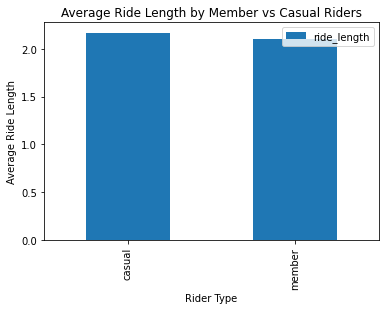

In [15]:

import matplotlib.pyplot as plt

# plot the pivot table
pivot.plot(kind='bar')
plt.title('Average Ride Length by Member vs Casual Riders')
plt.xlabel('Rider Type')
plt.ylabel('Average Ride Length')
plt.show()

In [16]:
# create a pivot table to calculate average ride length by day of week and user type
pivot = pd.pivot_table(merged_df, values='ride_length', index=['member_casual'], 
                       columns=['day_of_week'],
                       aggfunc={'ride_length': 'mean'})

# display the pivot table
print(pivot)

day_of_week      Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
member_casual                                                               
casual         2.136571  2.079673  2.288372  2.227277  2.119741  2.071526   
member         2.042689  2.028529  2.187847  2.140333  2.078601  2.050583   

day_of_week    Wednesday  
member_casual             
casual          2.154256  
member          2.181886  


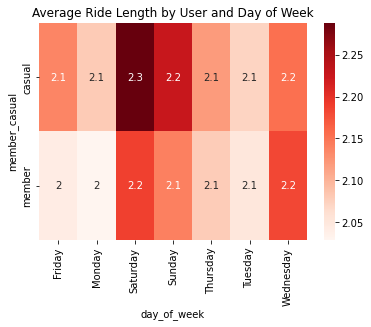

In [17]:
import seaborn as sns
# plot the pivot table as a heatmap
sns.heatmap(pivot, annot=True, cmap='Reds')

# set plot title
plt.title("Average Ride Length by User and Day of Week")

# show the plot
plt.show()

In [18]:
# create a pivot table to calculate ride count by day of week and user type
pivot = pd.pivot_table(merged_df, values='ride_id', index=['member_casual'], 
                       columns=['day_of_week'], aggfunc='count')

# display the pivot table
print(pivot)

day_of_week    Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
member_casual                                                                
casual         338806  283327    478479  398647    313642   272322     279897
member         481194  488630    454818  402869    547400   546620     542433


In [19]:
# find the number of rows in the dataframe
num_rows = merged_df.shape[0]

print("Number of rows in the dataframe: ", num_rows)

Number of rows in the dataframe:  5829084


In [20]:
# summarize the dataframe
summary = merged_df.describe()

# display the summary
print(summary)


         Unnamed: 0     start_lat     start_lng       end_lat       end_lng  \
count  5.829084e+06  5.829084e+06  5.829084e+06  5.823146e+06  5.823146e+06   
mean   3.030192e+05  4.190217e+01 -8.764779e+01  4.190237e+01 -8.764786e+01   
std    2.140159e+05  4.626503e-02  2.927663e-02  6.757085e-02  1.068591e-01   
min    0.000000e+00  4.164000e+01 -8.784000e+01  0.000000e+00 -8.814000e+01   
25%    1.214390e+05  4.188103e+01 -8.766150e+01  4.188103e+01 -8.766201e+01   
50%    2.613320e+05  4.190000e+01 -8.764411e+01  4.190000e+01 -8.764414e+01   
75%    4.693720e+05  4.193000e+01 -8.762963e+01  4.193000e+01 -8.762963e+01   
max    8.234870e+05  4.207000e+01 -8.752000e+01  4.237000e+01  0.000000e+00   

        ride_length  
count  5.823146e+06  
mean   2.127500e+00  
std    1.165804e+01  
min    0.000000e+00  
25%    8.684415e-01  
50%    1.563982e+00  
75%    2.771682e+00  
max    9.814069e+03  


session           Night             Morning           Afternoon            \
member_casual    casual    member    casual    member    casual    member   
month                                                                       
1              1.794828  1.833176  1.603136  1.751081  1.670007  1.762705   
2              1.728136  1.838535  1.719474  1.796542  1.815077  1.827728   
3              2.219462  2.022975  2.233180  1.961957  2.210278  2.032609   
4              2.296017  2.061325  2.279567  1.923842  2.261604  1.977559   
5              2.220102  2.203280  2.339076  2.108876  2.315109  2.189488   
6              2.122570  2.330306  2.296624  2.202192  2.313030  2.277480   
7              2.106418  2.346866  2.257644  2.218593  2.289360  2.279935   
8              2.144169  2.346630  2.237306  2.177371  2.263288  2.240891   
9              2.137819  2.225641  2.203425  2.121477  2.225115  2.178905   
10             1.944317  2.100654  2.115286  1.993569  2.101944  2.034021   

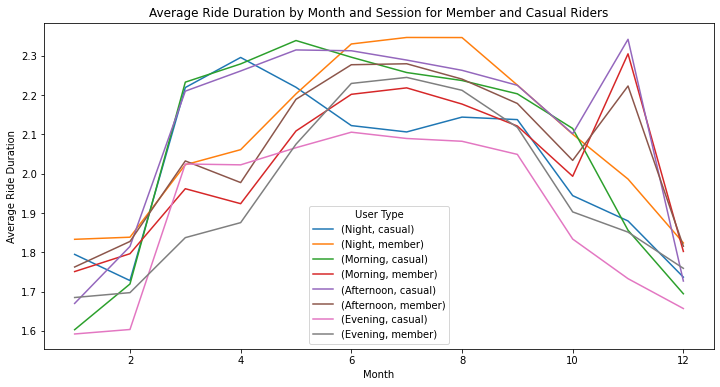

In [21]:
# Transform the datetime string to datetime
merged_df['started_at'] = pd.to_datetime(merged_df['started_at'])

# Add a column for session based on time of the day
merged_df['session'] = pd.cut(merged_df['started_at'].dt.hour,
                              bins=[0, 6, 12, 18, 24],
                              labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# create month column
merged_df['month'] = pd.to_datetime(merged_df['started_at']).dt.month

# create a pivot table to calculate average ride duration by month and session for member and casual riders
pivot = pd.pivot_table(merged_df, values='ride_length', 
                       index=['month'], columns=['session', 'member_casual'], 
                       aggfunc={'ride_length': 'mean'})

# display the pivot table
print(pivot)

# plot the pivot table as a line chart
pivot.plot(kind='line', figsize=(12,6))
plt.title('Average Ride Duration by Month and Session for Member and Casual Riders')
plt.xlabel('Month')
plt.ylabel('Average Ride Duration')
plt.legend(title='User Type')
plt.show()

In [22]:
# create the pivot table
pivot = pd.pivot_table(merged_df, values='ride_length', index=['month'], columns=['session', 'member_casual'], 
                       aggfunc={'ride_length': 'mean'})

# display the pivot table
print(pivot)



session           Night             Morning           Afternoon            \
member_casual    casual    member    casual    member    casual    member   
month                                                                       
1              1.794828  1.833176  1.603136  1.751081  1.670007  1.762705   
2              1.728136  1.838535  1.719474  1.796542  1.815077  1.827728   
3              2.219462  2.022975  2.233180  1.961957  2.210278  2.032609   
4              2.296017  2.061325  2.279567  1.923842  2.261604  1.977559   
5              2.220102  2.203280  2.339076  2.108876  2.315109  2.189488   
6              2.122570  2.330306  2.296624  2.202192  2.313030  2.277480   
7              2.106418  2.346866  2.257644  2.218593  2.289360  2.279935   
8              2.144169  2.346630  2.237306  2.177371  2.263288  2.240891   
9              2.137819  2.225641  2.203425  2.121477  2.225115  2.178905   
10             1.944317  2.100654  2.115286  1.993569  2.101944  2.034021   

<ipython-input-23-6fe18c288540>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


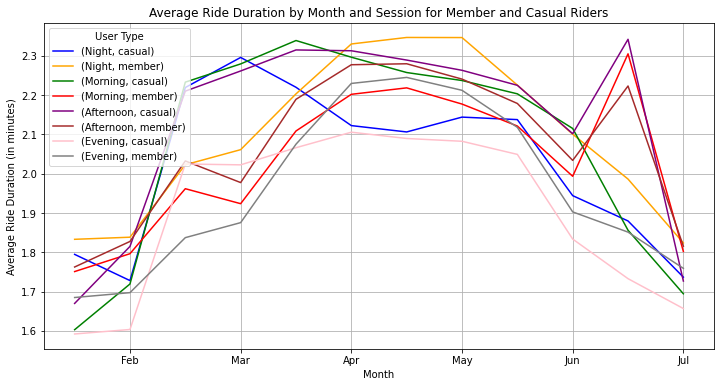

In [23]:
# plot the pivot table as a line chart with modified settings
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

ax = pivot.plot(kind='line', figsize=(12,6), color=colors)
ax.set_title('Average Ride Duration by Month and Session for Member and Casual Riders')
ax.set_xlabel('Month')
ax.set_ylabel('Average Ride Duration (in minutes)')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.legend(title='User Type', loc='upper left')
ax.grid()

plt.show()

In [24]:
# Convert 'member_casual' column to categorical
merged_df['member_casual'] = pd.Categorical(merged_df['member_casual'])

# create the pivot table with grouped sessions by user type
merged_df['session_type'] = merged_df['session'].str.cat(merged_df['member_casual'], sep='_')

pivot = pd.pivot_table(merged_df, values='ride_length', index=['month'], columns=['session_type'], aggfunc={'ride_length': 'mean'})

# display the pivot table
print(pivot)


session_type  Afternoon_casual  Afternoon_member  Evening_casual  \
month                                                              
1                     1.670007          1.762705        1.592255   
2                     1.815077          1.827728        1.603661   
3                     2.210278          2.032609        2.024847   
4                     2.261604          1.977559        2.022686   
5                     2.315109          2.189488        2.066296   
6                     2.313030          2.277480        2.105806   
7                     2.289360          2.279935        2.089774   
8                     2.263288          2.240891        2.082657   
9                     2.225115          2.178905        2.049281   
10                    2.101944          2.034021        1.833799   
11                    2.342198          2.223331        1.733003   
12                    1.726953          1.815539        1.657001   

session_type  Evening_member  Morning_casual  M

<ipython-input-25-b426d48f108b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])


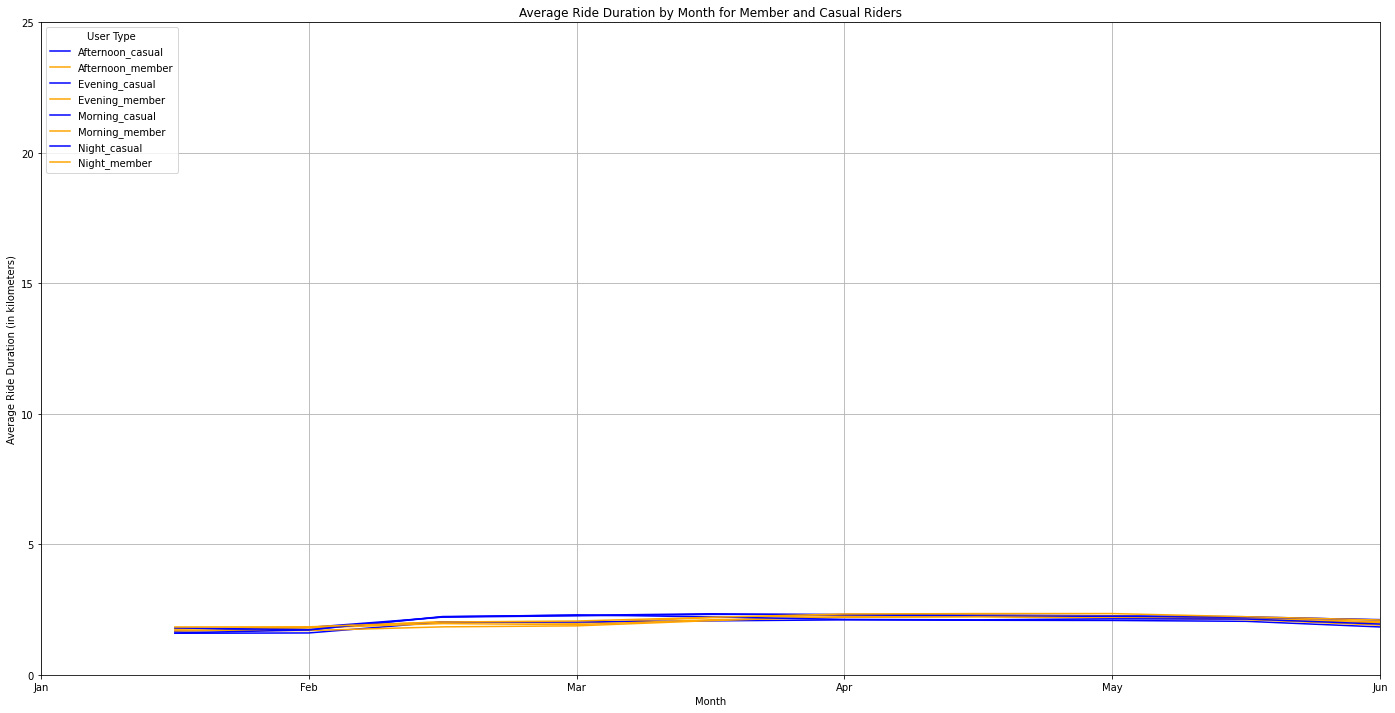

In [25]:
colors = ['blue', 'orange']

ax = pivot.plot(kind='line', figsize=(24,12), color=colors)
ax.set_title('Average Ride Duration by Month for Member and Casual Riders')
ax.set_xlabel('Month')
ax.set_ylabel('Average Ride Duration (in kilometers)')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlim([0, 10])  # set x-axis limits to show all months
ax.legend(title='User Type', loc='upper left')

# set y-axis limits to a fixed range for better comparison
ax.set_ylim([0, 25])

ax.grid()

plt.show()

In [26]:
merged_df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'day_of_week', 'session', 'month',
       'session_type'],
      dtype='object')

In [27]:
merged_df['started_at'] = pd.to_datetime(merged_df['started_at'])
merged_df['ended_at'] = pd.to_datetime(merged_df['ended_at'])

# Define a function to calculate ride length in minutes

def calculate_ride_length_in_minutes(row):
    ride_length = (row['ended_at'] - row['started_at']).total_seconds()
    return round(ride_length / 60)

# Apply the function to each row and add the result as a new column
merged_df['ride_length_minutes'] = merged_df.apply(calculate_ride_length_in_minutes, axis=1)

In [30]:
# Define a function to calculate the season based on the month value
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new column for season
merged_df['season'] = merged_df['month'].apply(get_season)

# Group the merged_df dataframe by season, session_type, and member_casual
grouped_df = merged_df.groupby(['season', 'member_casual'])

# Calculate the mean and median ride_length_minutes for each group
mean_ride_length = grouped_df['ride_length_minutes'].mean().dropna()
median_ride_length = grouped_df['ride_length_minutes'].median().dropna()

# Print the results
print("Mean ride length by season, session type, and user type:")
print(mean_ride_length)

print("\nMedian ride length by season, session type, and user type:")
print(median_ride_length)

Mean ride length by season, session type, and user type:
season  member_casual
Fall    casual           26.319702
        member           12.163002
Spring  casual           30.844514
        member           12.442491
Summer  casual           30.204104
        member           13.692291
Winter  casual           22.785996
        member           10.559853
Name: ride_length_minutes, dtype: float64

Median ride length by season, session type, and user type:
season  member_casual
Fall    casual           11.0
        member            8.0
Spring  casual           15.0
        member            9.0
Summer  casual           14.0
        member           10.0
Winter  casual            8.0
        member            7.0
Name: ride_length_minutes, dtype: float64


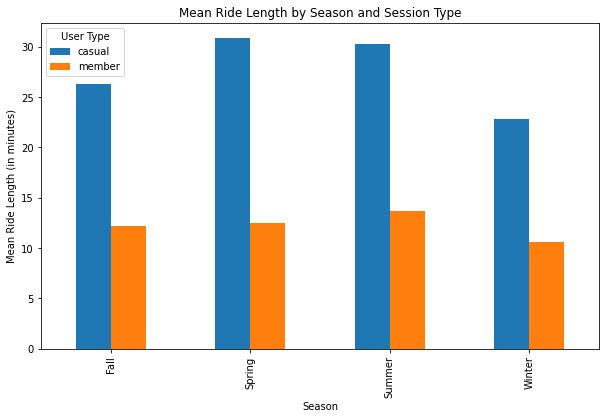

In [32]:
# Calculate the mean ride length by season, session type, and user type
mean_ride_length = grouped_df['ride_length_minutes'].mean()

# Convert the resulting series to a dataframe and reset the index
mean_ride_length_df = mean_ride_length.reset_index()

# Pivot the dataframe to create a matrix of season and session_type by mean ride_length
pivot_mean = mean_ride_length_df.pivot(index='season', columns=['member_casual'], values='ride_length_minutes')

# Create a bar plot of the mean ride length by season and session type
ax = pivot_mean.plot(kind='bar', figsize=(10,6))
ax.set_title('Mean Ride Length by Season and Session Type')
ax.set_xlabel('Season')
ax.set_ylabel('Mean Ride Length (in minutes)')
ax.legend(title='User Type', loc='upper left')

plt.show()